In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from copy import deepcopy
import os
import os.path as op
import sys
from matplotlib import pyplot as plt
import statsmodels as sm
import statsmodels.api as sma
%matplotlib
import glmtools as glm


loc = 'workstation'
if loc == 'laptop':
    #eyefuncdir = '/Users/sammichekroud/Desktop/postdoc/student_projects/EffortDifficulty/analysis/tools'
    eyefuncdir = '/Users/sammichekroud/Desktop/postdoc/tools'
    wd         = '/Users/sammichekroud/Desktop/postdoc/wmconfidence' #working on confidence data, but in postdoc dir
elif loc == 'workstation':
    eyefuncdir = 'C:/Users/sammirc/Desktop/postdoc/tools/'
    wd         =  'C:/Users/sammirc/Desktop/postdoc/tuningcurves'
os.chdir(wd)
sys.path.insert(0, eyefuncdir)
#import eyefuncs_v2 as eyes
import eyefuncs as eyes

eyedir = op.join(wd, 'data', 'eyes')
bdir   = op.join(wd, 'data', 'datafiles')

subs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
subs = np.array([         4, 5, 6, 7, 8, 9,     11, 12, 13, 14, 15, 16, 17, 18,     20, 21, 22,     24, 25, 26])
# subs = np.array([         4, 5, 6, 7, 8, 9,             13, 14, 15,     17,         20, 21, 22,     24, 25, 26])
nsubs = subs.size
#set some params here
modeltimes = np.round(np.load(op.join(wd, 'data', 'tuningcurves', 'times.npy')), 2)
subcorrs = np.zeros(shape = [nsubs, 2, 4, 175]) * np.nan


Using matplotlib backend: module://matplotlib_inline.backend_inline


-- working on participant 1/20 --
-- working on participant 2/20 --
-- working on participant 3/20 --
-- working on participant 4/20 --
-- working on participant 5/20 --
-- working on participant 6/20 --
-- working on participant 7/20 --
-- working on participant 8/20 --
-- working on participant 9/20 --
-- working on participant 10/20 --
-- working on participant 11/20 --
-- working on participant 12/20 --
-- working on participant 13/20 --
-- working on participant 14/20 --
-- working on participant 15/20 --
-- working on participant 16/20 --
-- working on participant 17/20 --
-- working on participant 18/20 --
-- working on participant 19/20 --
-- working on participant 20/20 --


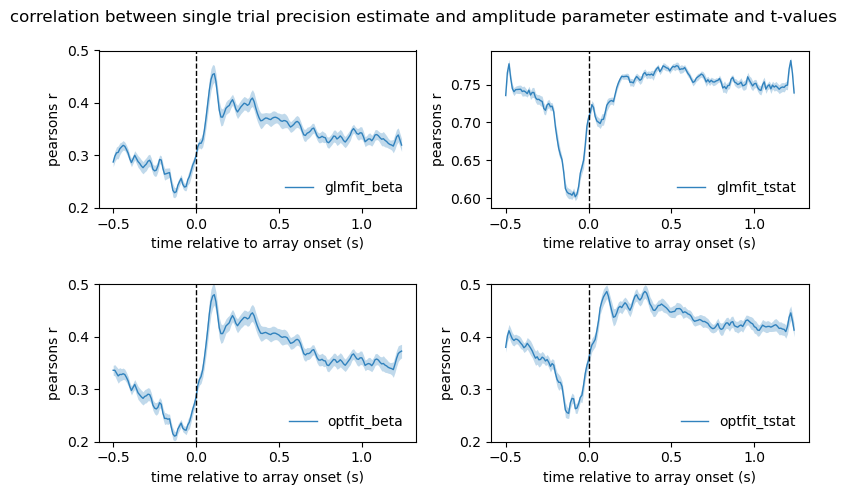

In [2]:
subcount = -1
for sub in subs:
    subcount += 1
    print(f'-- working on participant {subcount+1}/{nsubs} --')
    # if not op.exists(op.join(eyedir, 'preprocessed', f'EffDS{sub}_preprocessed.pickle')): #dont do this if it already exists!
    binstep, binwidth = 4, 22
    # binstep, binwidth = 15, 22
    smooth_alphas, smooth_sigma = True, 3
    
    #read in modelled tuning curve parameters
    alpha = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'twostage_alphaminmaxfit_b1desmatminmax',
            f's{sub}_ParamFits_precision_binstep{binstep}_binwidth{binwidth}_smoothedprec.npy'))
    
    
    ampglm = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'twostage_alphaminmaxfit_b1desmatminmax',
        f's{sub}_ParamFits_amplitude_binstep{binstep}_binwidth{binwidth}_smoothedprec_glmfit.npy'))
    
    ampopt = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'twostage_alphaminmaxfit_b1desmatminmax',
        f's{sub}_ParamFits_amplitude_binstep{binstep}_binwidth{binwidth}_smoothedprec_optfit.npy'))
    # note here precision is modelled in the same way, but amplitude is modelled with a constrained alpha (min 0.001), and minmax-scaled design matrix for the glmfit. optimised fit doesnt have to scale the design matrix

    #tuning curve parameters when distances are smoothed before model fitting
    # alpha = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'twostageminmax_smoothdists',
    #             f's{sub}_ParamFits_precision_binstep{binstep}_binwidth{binwidth}_smoothedprec.npy'))
    
    # ampglm = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'twostageminmax_smoothdists',
    #         f's{sub}_ParamFits_amplitude_binstep{binstep}_binwidth{binwidth}_glmfit.npy'))

    # ampopt = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'twostageminmax_smoothdists',
    #         f's{sub}_ParamFits_amplitude_binstep{binstep}_binwidth{binwidth}_optfit.npy'))

    #get correlation between precision and amplitude across trials, at each time point
    [nitems, ntrials, nparams, ntimes] = ampglm.shape
    corrs = np.zeros(shape = [nitems, 4, ntimes]) * np.nan #save [pearson, spearman] corr coefs
    for iitem in range(nitems):
        for tp in range(ntimes):
            ia = alpha[iitem, :, tp].copy()
            iglmb = ampglm[iitem, :, 0, tp].copy() #0th estimated parameter is the beta weight
            iglmt = ampglm[iitem, :, 1, tp].copy() #actually look at the correlation with the t-value for amplitude estimate
            ioptb = ampopt[iitem, :, 0, tp].copy()
            ioptt = ampopt[iitem, :, 1, tp].copy()
            icorr = [sp.stats.pearsonr(ia, iglmb).statistic, sp.stats.pearsonr(ia, iglmt).statistic, sp.stats.pearsonr(ia, ioptb).statistic, sp.stats.pearsonr(ia, ioptt).statistic]
            # ispear = sp.stats.spearmanr(ia, ib).statistic
            corrs[iitem, :, tp] = icorr #
    subcorrs[subcount] = corrs.copy()

gm = subcorrs.mean(1) #average across items

gmean = gm.mean(0)
gsem  = sp.stats.sem(gm, axis=0, ddof=0, nan_policy='omit')

fig = plt.figure(figsize = [8, 5])
ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)
axes = [ax1, ax2, ax3, ax4]
ncorrs = 4
corrlabels = ['glmfit_beta', 'glmfit_tstat', 'optfit_beta', 'optfit_tstat']
axcount = 0
for icorr in range(ncorrs):
    axcount +=1
    ax = axes[axcount-1]
    ax.plot(modeltimes, gmean[icorr], lw = 1, color = '#3182bd', label = corrlabels[icorr])
    ax.fill_between(modeltimes, np.add(gmean[icorr], gsem[icorr]), np.subtract(gmean[icorr], gsem[icorr]), edgecolor=None, lw = 0, color = '#3182bd', alpha = 0.3)
    # ax.axhline(0, lw=1, ls='dashed', color='k')
    ax.axvline(0, lw=1, ls='dashed', color='k')
    ax.legend(loc = 'lower right', frameon = False)
    ax.set_xlabel('time relative to array onset (s)')
    ax.set_ylabel('pearsons r')
    if axcount in [1, 3, 4]:
        ax.set_ylim([0.2, 0.5])
fig.suptitle('correlation between single trial precision estimate and amplitude parameter estimate and t-values')
fig.tight_layout(h_pad = 2)

<font color='red'>

correlation is calculated across trials, separately for each time point, within a participant. It is done separately for each item in the array (i.e. checks correlation between precision and amplitude for the item-specific tuning curve parameters). This gives a correlation timecourse per participant. I plot the grand average (across subject mean + standard error) of this timecourse here

</font>

<font color='blue'>

does the correlation between precision and amplitude (estimated in different ways) change if the distances are smoothed across time *before* estimating tuning curve parameters?

-- working on participant 1/20 --
-- working on participant 2/20 --
-- working on participant 3/20 --
-- working on participant 4/20 --
-- working on participant 5/20 --
-- working on participant 6/20 --
-- working on participant 7/20 --
-- working on participant 8/20 --
-- working on participant 9/20 --
-- working on participant 10/20 --
-- working on participant 11/20 --
-- working on participant 12/20 --
-- working on participant 13/20 --
-- working on participant 14/20 --
-- working on participant 15/20 --
-- working on participant 16/20 --
-- working on participant 17/20 --
-- working on participant 18/20 --
-- working on participant 19/20 --
-- working on participant 20/20 --


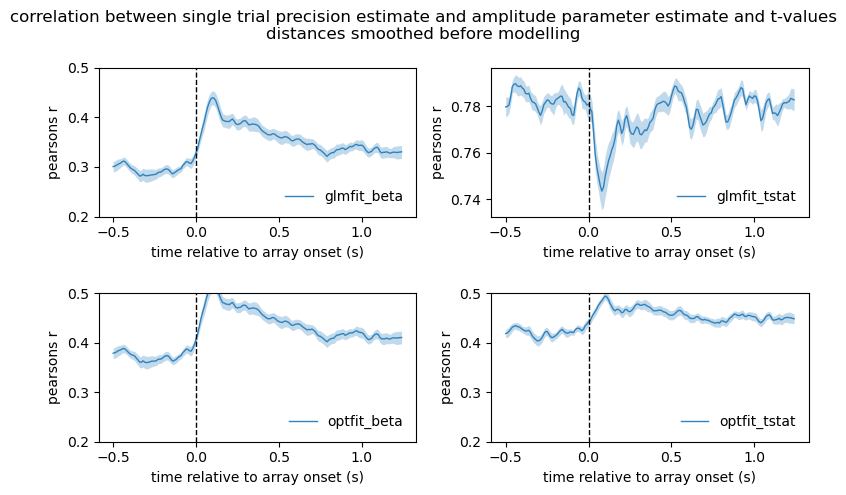

In [3]:
subcorrs = np.zeros(shape = [nsubs, 2, 4, 175]) * np.nan


subcount = -1
for sub in subs:
    subcount += 1
    print(f'-- working on participant {subcount+1}/{nsubs} --')
    # if not op.exists(op.join(eyedir, 'preprocessed', f'EffDS{sub}_preprocessed.pickle')): #dont do this if it already exists!
    binstep, binwidth = 4, 22
    # binstep, binwidth = 15, 22

    #tuning curve parameters when distances are smoothed before model fitting
    alpha = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'twostageminmax_smoothdists',
                f's{sub}_ParamFits_precision_binstep{binstep}_binwidth{binwidth}_smoothedprec.npy'))
    
    ampglm = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'twostageminmax_smoothdists',
            f's{sub}_ParamFits_amplitude_binstep{binstep}_binwidth{binwidth}_glmfit.npy'))

    ampopt = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'twostageminmax_smoothdists',
            f's{sub}_ParamFits_amplitude_binstep{binstep}_binwidth{binwidth}_optfit.npy'))

    #get correlation between precision and amplitude across trials, at each time point
    [nitems, ntrials, nparams, ntimes] = ampglm.shape
    corrs = np.zeros(shape = [nitems, 4, ntimes]) * np.nan #save [pearson, spearman] corr coefs
    for iitem in range(nitems):
        for tp in range(ntimes):
            ia = alpha[iitem, :, tp].copy()
            iglmb = ampglm[iitem, :, 0, tp].copy() #0th estimated parameter is the beta weight
            iglmt = ampglm[iitem, :, 1, tp].copy() #actually look at the correlation with the t-value for amplitude estimate
            ioptb = ampopt[iitem, :, 0, tp].copy()
            ioptt = ampopt[iitem, :, 1, tp].copy()
            icorr = [sp.stats.pearsonr(ia, iglmb).statistic, sp.stats.pearsonr(ia, iglmt).statistic, sp.stats.pearsonr(ia, ioptb).statistic, sp.stats.pearsonr(ia, ioptt).statistic]
            # ispear = sp.stats.spearmanr(ia, ib).statistic
            corrs[iitem, :, tp] = icorr #
    subcorrs[subcount] = corrs.copy()

gm = subcorrs.mean(1) #average across items

gmean = gm.mean(0)
gsem  = sp.stats.sem(gm, axis=0, ddof=0, nan_policy='omit')

fig = plt.figure(figsize = [8, 5])
ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)
axes = [ax1, ax2, ax3, ax4]
ncorrs = 4
corrlabels = ['glmfit_beta', 'glmfit_tstat', 'optfit_beta', 'optfit_tstat']
axcount = 0
for icorr in range(ncorrs):
    axcount +=1
    ax = axes[axcount-1]
    ax.plot(modeltimes, gmean[icorr], lw = 1, color = '#3182bd', label = corrlabels[icorr])
    ax.fill_between(modeltimes, np.add(gmean[icorr], gsem[icorr]), np.subtract(gmean[icorr], gsem[icorr]), edgecolor=None, lw = 0, color = '#3182bd', alpha = 0.3)
    # ax.axhline(0, lw=1, ls='dashed', color='k')
    ax.axvline(0, lw=1, ls='dashed', color='k')
    ax.legend(loc = 'lower right', frameon = False)
    ax.set_xlabel('time relative to array onset (s)')
    ax.set_ylabel('pearsons r')
    if axcount in [1, 3, 4]:
        ax.set_ylim([0.2, 0.5])
fig.suptitle('correlation between single trial precision estimate and amplitude parameter estimate and t-values\ndistances smoothed before modelling')
fig.tight_layout(h_pad = 2)